In [4]:
!pip install python-dotenv
!pip install requests
!pip install tqdm
!pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 KB 1.0 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 1.1 MB/s eta 0:00:00ta 0:00:01


In [5]:
import sorrentum_sandbox.examples.ml_projects.Issue22_Team3_Implement_sandbox_for_Coinmarketcap as coinmarketcap

coinmarketcap_load = coinmarketcap.load_data_from_db

In [32]:
cmc_data=coinmarketcap_load.get_quote_data('bitcoin_features')
cmc_data[1000:1980]

,_id,name,price,nvt_ratio,mc_fdmc_ratio,market_cap_dominance,last_updated,mc_dominance
1000,6453f54136daff84af1c4ef7,Bitcoin,29991.012282,39.251068,0.921348,NaN,2023-04-17 04:09:00,45.6821
1001,6453f54136daff84af1c4ef8,Bitcoin,29983.870972,39.212975,0.921348,NaN,2023-04-17 04:10:00,45.6800
1002,6453f54136daff84af1c4ef9,Bitcoin,29991.908733,39.225995,0.921350,NaN,2023-04-17 04:11:00,45.6924
1003,6453f54136daff84af1c4efa,Bitcoin,29984.424383,39.204764,0.921350,NaN,2023-04-17 04:12:00,45.6810
1004,6453f54136daff84af1c4efb,Bitcoin,29983.603336,39.188709,0.921350,NaN,2023-04-17 04:13:00,45.6797
...,...,...,...,...,...,...,...,...
1975,6453f54136daff84af1c52c6,Bitcoin,28841.903543,28.601200,0.922101,NaN,2023-05-04 18:00:00,47.0757
1976,6453f54136daff84af1c52c7,Bitcoin,28843.427334,28.721868,0.922101,NaN,2023-05-04 18:01:00,47.0782
1977,6453f54136daff84af1c52c8,Bitcoin,28847.388905,28.838900,0.922101,NaN,2023-05-04 18:02:00,47.0886
1978,6453f54136daff84af1c52c9,Bitcoin,28851.057970,29.026101,0.922101,NaN,2023-05-04 18:03:00,47.0946


In [38]:
cmc_data=coinmarketcap_load.get_quote_data('bitcoin_coinmarketcap_spot_downloaded_1min')
cmc_data

,_id,1
0,643c8f0ca1d0d4f44222afbd,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
1,643c8f2d1dac7ca845ab121e,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
2,643c8f69bcaa7ad6578d7438,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
3,643c8fa58813dd78a9303362,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
4,643c8fe147543f8dac31808d,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
...,...,...
1227,6453fd8b9b37ead6303a96c9,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
1228,6453fdc86d29d06923e9c82d,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
1229,6453fe0441e4d354c6824cdf,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."
1230,6453fe3f0bbcd1ceb1e33db1,"{'id': '1', 'name': 'Bitcoin', 'symbol': 'BTC'..."


In [39]:
import pytz
import pandas as pd

cmc_data = cmc_data.rename(columns={'1': 'data'})
cmc_data = pd.concat([cmc_data[cmc_data.columns.difference(['data'])], pd.json_normalize(cmc_data.data)], axis=1)

kept_columns = ['_id','name', 'id', 'cmc_rank', 'max_supply','total_supply','circulating_supply', 'quote.USD.last_updated','quote.USD.price', 'quote.USD.market_cap', 'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap','quote.USD.volume_24h', 
                ]
cmc_data_simplify = cmc_data[kept_columns]
cmc_data_simplify.columns = cmc_data_simplify.columns.str.replace('quote.USD.', '')
# cmc_data_simplify['last_updated'] = pd.to_datetime(cmc_data_simplify['last_updated'])
# cmc_data_simplify['last_updated'] = cmc_data_simplify['last_updated'].dt.tz_convert(pytz.timezone('US/Eastern'))
cmc_data_simplify[1000:]


/tmp/ipykernel_27/1888299691.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  cmc_data_simplify.columns = cmc_data_simplify.columns.str.replace('quote.USD.', '')


,_id,name,id,cmc_rank,max_supply,total_supply,circulating_supply,last_updated,price,market_cap,market_cap_dominance,fully_diluted_market_cap,volume_24h
1000,645341c44c53e63849e07940,Bitcoin,1,1,21000000,19363700,19363700,2023-05-04T05:23:00.000Z,29110.859979,5.636940e+11,47.0784,611328059565.810059,1.933531e+10
1001,64534200cf647ed57f61dd95,Bitcoin,1,1,21000000,19363700,19363700,2023-05-04T05:24:00.000Z,29121.712536,5.639041e+11,47.1156,611555963266.290039,1.933548e+10
1002,6453423e1133a12ef540a793,Bitcoin,1,1,21000000,19363700,19363700,2023-05-04T05:25:00.000Z,29116.198259,5.637973e+11,47.1067,611440163446.709961,1.933564e+10
1003,64534279468614b45325a10a,Bitcoin,1,1,21000000,19363700,19363700,2023-05-04T05:26:00.000Z,29115.996847,5.637934e+11,47.1063,611435933793.599976,1.934766e+10
1004,645342b5e4ac30a4d69f960c,Bitcoin,1,1,21000000,19363700,19363700,2023-05-04T05:27:00.000Z,29117.069915,5.638142e+11,47.1081,611458468215.430054,1.934830e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,6453fd8b9b37ead6303a96c9,Bitcoin,1,1,21000000,19364175,19364175,2023-05-04T18:44:00.000Z,28778.751636,5.572768e+11,47.0851,604353784365.699951,1.842378e+10
1228,6453fdc86d29d06923e9c82d,Bitcoin,1,1,21000000,19364175,19364175,2023-05-04T18:45:00.000Z,28777.230625,5.572473e+11,47.0827,604321843118.060059,1.840812e+10
1229,6453fe0441e4d354c6824cdf,Bitcoin,1,1,21000000,19364175,19364175,2023-05-04T18:46:00.000Z,28788.986873,5.574750e+11,47.1019,604568724329.77002,1.839895e+10
1230,6453fe3f0bbcd1ceb1e33db1,Bitcoin,1,1,21000000,19364175,19364175,2023-05-04T18:47:00.000Z,28782.774156,5.573547e+11,47.0849,604438257271.75,1.833458e+10


In [40]:
# Convert the 'last_updated' column to datetime objects
cmc_data_simplify['last_updated'] = pd.to_datetime(cmc_data_simplify['last_updated'])
cmc_data_simplify[1000:]

,_id,name,id,cmc_rank,max_supply,total_supply,circulating_supply,last_updated,price,market_cap,market_cap_dominance,fully_diluted_market_cap,volume_24h
1000,645341c44c53e63849e07940,Bitcoin,1,1,21000000,19363700,19363700,2023-05-04 05:23:00+00:00,29110.859979,5.636940e+11,47.0784,611328059565.810059,1.933531e+10
1001,64534200cf647ed57f61dd95,Bitcoin,1,1,21000000,19363700,19363700,2023-05-04 05:24:00+00:00,29121.712536,5.639041e+11,47.1156,611555963266.290039,1.933548e+10
1002,6453423e1133a12ef540a793,Bitcoin,1,1,21000000,19363700,19363700,2023-05-04 05:25:00+00:00,29116.198259,5.637973e+11,47.1067,611440163446.709961,1.933564e+10
1003,64534279468614b45325a10a,Bitcoin,1,1,21000000,19363700,19363700,2023-05-04 05:26:00+00:00,29115.996847,5.637934e+11,47.1063,611435933793.599976,1.934766e+10
1004,645342b5e4ac30a4d69f960c,Bitcoin,1,1,21000000,19363700,19363700,2023-05-04 05:27:00+00:00,29117.069915,5.638142e+11,47.1081,611458468215.430054,1.934830e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,6453fd8b9b37ead6303a96c9,Bitcoin,1,1,21000000,19364175,19364175,2023-05-04 18:44:00+00:00,28778.751636,5.572768e+11,47.0851,604353784365.699951,1.842378e+10
1228,6453fdc86d29d06923e9c82d,Bitcoin,1,1,21000000,19364175,19364175,2023-05-04 18:45:00+00:00,28777.230625,5.572473e+11,47.0827,604321843118.060059,1.840812e+10
1229,6453fe0441e4d354c6824cdf,Bitcoin,1,1,21000000,19364175,19364175,2023-05-04 18:46:00+00:00,28788.986873,5.574750e+11,47.1019,604568724329.77002,1.839895e+10
1230,6453fe3f0bbcd1ceb1e33db1,Bitcoin,1,1,21000000,19364175,19364175,2023-05-04 18:47:00+00:00,28782.774156,5.573547e+11,47.0849,604438257271.75,1.833458e+10


In [19]:
import matplotlib.pyplot as plt
bitcoin_data = cmc_data
bitcoin_data = bitcoin_data.loc[:, ['last_updated', 'price']] 
bitcoin_data

,last_updated,price
0,2023-04-16 20:11:00-04:00,30287.855720
1,2023-04-16 20:11:00-04:00,30287.855720
2,2023-04-16 20:12:00-04:00,30269.606957
3,2023-04-16 20:13:00-04:00,30290.560042
4,2023-04-16 20:14:00-04:00,30317.534353
...,...,...
247,2023-05-03 01:57:00-04:00,28481.697961
248,2023-05-03 01:58:00-04:00,28483.828897
249,2023-05-03 01:59:00-04:00,28488.297833
250,2023-05-03 01:59:00-04:00,28488.297833


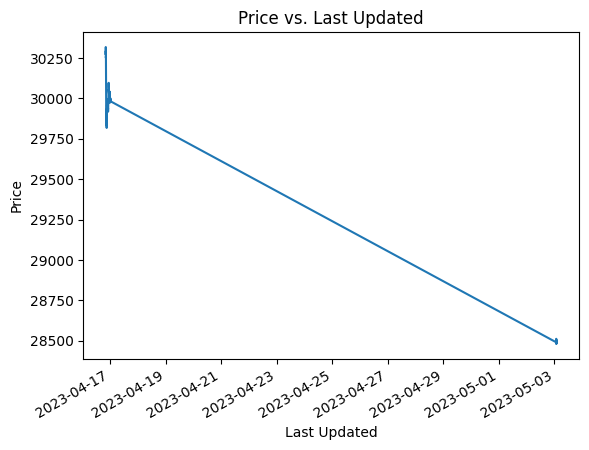

In [20]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert type of column last_updated to datetime
bitcoin_data['last_updated'] = pd.to_datetime(bitcoin_data['last_updated'])

# Set last_updated as index
bitcoin_data.set_index('last_updated', inplace=True)

# draw price
bitcoin_data['price'].plot()

# Set title, xlabel, ylable for graph
plt.title('Price vs. Last Updated')
plt.xlabel('Last Updated')
plt.ylabel('Price')

# Show graph
plt.show()

In [11]:
# Some basic analysis
# Looking for anomalies in the data
# Checking that the cryptocoin prices are positive
price = (cmc_data['price']>=0).all()
# Checking that the volumes traded is positive
volume_24h = (cmc_data['volume_24h']>=0).all()
# Checking that the market caps are positive
market_cap = (cmc_data['market_cap']>=0).all()
check = [price, volume_24h, market_cap]
if False not in check:
  print("1. There were no anomalies found in the data.")
else:
  columns = ['price', 'volume_24h', 'market_cap',]
  for i in list(range(0,3)):
    if check[i] == False:
      print("1. There were anomalies found in the " + columns[i] + " column.\n")

# Check if all the IDs are the same to ensure all data in one collection are from the same cryptocurrency.

if cmc_data['id'].nunique() == 1:
    print("2. All values in column id are the same.")
else:
    print("2. Not all values in column id are the same.")


1. There were no anomalies found in the data.
2. All values in column id are the same.


In the above code, we are checking to see if all the prices, volume changes, and market caps were greater than or equal to 0 as we shouldn't see any negative values. We were also checking that if all the IDs are the same to ensure all data in one colection are from the same cryptocurrency.

In [12]:
# Checking for missing values
missing = cmc_data.isnull().sum().sum()
if missing == 0:
  print("There are no missing values in the dataset.")
else:
  print("The data contains " + str(missing) + " missing values.")

There are no missing values in the dataset.
